<a href="https://colab.research.google.com/github/shreyasd1/twitter_sentiment_analysis/blob/main/twitter_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**importing libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tweepy as tw
from wordcloud import WordCloud
import re
from textblob import TextBlob
plt.style.use('fivethirtyeight') 

**connecting to twitter api**

In [ ]:
consumer_key= ''
consumer_secret= ''
access_token= ''
access_token_secret= ''

In [ ]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

**Extracting Tweets**

In [ ]:
tweets = api.user_timeline(screen_name = 'BillGates', count = 100, lang = 'en', tweet_mode = 'extended')
i = 1
for tweet in tweets[0:5]:
  print(str(i) + ')' + tweet.full_text + '\n')
  i += 1

1)Africa's success against wild polio last year is one of the most inspiring stories in global health. I’m optimistic that, with the commitment and collaboration that achieved that goal, countries in the region can beat all forms of the virus and #EndPolio https://t.co/lpJsrhAQcf

2)None of us would be where we are today without the incredible teachers who helped shape our perspectives. Brooke Brown is an extraordinary teacher who has helped her students adapt to extraordinary times. https://t.co/btiQikTyVX

3).@GAP_Foundation’s Bio-Hermes Study is the first to compare results of blood and digital biomarker tests with imaging and traditional cognitive tests. This could help identify Alzheimer’s earlier and detect progression of the disease, to help us get closer to a cure. https://t.co/9xUQ0ZldSI

4)I recently sat down with the extraordinary Brooke Brown, Washington State’s 2021 Teacher of the Year. It was a pleasure to meet with her and take part in one of her favorite lessons: https:

**creating a dataframe**


In [ ]:
df = pd.DataFrame([tweet.full_text for tweet in tweets], columns= ['tweet'])
df.insert(1, "retweets", [tweet.retweet_count for tweet in tweets], True)
df.insert(2, "likes", [tweet.favorite_count for tweet in tweets], True)
df.head()

,tweet,retweets,likes
0,Africa's success against wild polio last year ...,158,1578
1,None of us would be where we are today without...,208,2200
2,.@GAP_Foundation’s Bio-Hermes Study is the fir...,154,1180
3,I recently sat down with the extraordinary Bro...,188,1840
4,"Happy Birthday, Warren! You’ve been a true fri...",720,8149


**Cleaning tweets**

In [ ]:
def cleanText(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text) # removing mentions
  text = re.sub(r'#', '', text) # removing Hashtags
  text = re.sub(r'RT[\s]+', '', text) # removing RT
  text = re.sub(r'https?:\/\/\S+', '', text) # removing hyperlink
  return text

df['tweet'] = df['tweet'].apply(cleanText)
df

,tweet,retweets,likes
0,Africa's success against wild polio last year ...,158,1578
1,None of us would be where we are today without...,208,2200
2,._Foundation’s Bio-Hermes Study is the first t...,154,1180
3,I recently sat down with the extraordinary Bro...,188,1840
4,"Happy Birthday, Warren! You’ve been a true fri...",720,8149
...,...,...,...
95,Who installed the most concrete?\n\nCheck your...,472,3714
96,The best way to prevent new variants from emer...,1288,6212
97,It's encouraging to see innovation and clean e...,557,4417
98,Here are five things you should know if you wa...,577,2924


**adding subjectivity and polarity columns**

In [ ]:
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return TextBlob(text).sentiment.polarity

df['subjectivity'] = df['tweet'].apply(getSubjectivity)
df['polarity'] = df['tweet'].apply(getPolarity)
df

,tweet,retweets,likes,subjectivity,polarity
0,Africa's success against wild polio last year ...,158,1578,0.327778,0.233333
1,None of us would be where we are today without...,208,2200,0.966667,0.522222
2,._Foundation’s Bio-Hermes Study is the first t...,154,1180,0.395833,0.062500
3,I recently sat down with the extraordinary Bro...,188,1840,0.634722,0.169444
4,"Happy Birthday, Warren! You’ve been a true fri...",720,8149,0.630556,0.634722
...,...,...,...,...,...
95,Who installed the most concrete?\n\nCheck your...,472,3714,0.400000,0.325000
96,The best way to prevent new variants from emer...,1288,6212,0.377273,0.568182
97,It's encouraging to see innovation and clean e...,557,4417,0.584848,0.401010
98,Here are five things you should know if you wa...,577,2924,0.000000,0.000000


**plotting the word cloud**

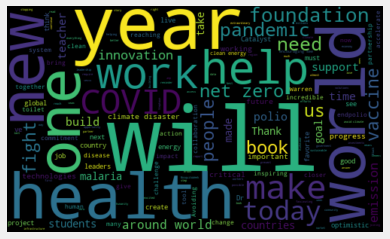

In [ ]:
allwords = ' '.join([tweet for tweet in df['tweet']])
wordcloud = WordCloud(width= 500, height= 300, random_state= 21, max_font_size=119).generate(allwords)
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis('off')
plt.show()

**analysis based on polarity**

In [ ]:
def getAnalysis(score):
  if score < 0:
    return "Negative"
  elif score == 0:
    return "Neutral"
  else:
    return "positive"

df['analysis based on polarity'] = df['polarity'].apply(getAnalysis)
df

,tweet,retweets,likes,subjectivity,polarity,analysis based on polarity
0,Africa's success against wild polio last year ...,158,1578,0.327778,0.233333,positive
1,None of us would be where we are today without...,208,2200,0.966667,0.522222,positive
2,._Foundation’s Bio-Hermes Study is the first t...,154,1180,0.395833,0.062500,positive
3,I recently sat down with the extraordinary Bro...,188,1840,0.634722,0.169444,positive
4,"Happy Birthday, Warren! You’ve been a true fri...",720,8149,0.630556,0.634722,positive
...,...,...,...,...,...,...
95,Who installed the most concrete?\n\nCheck your...,472,3714,0.400000,0.325000,positive
96,The best way to prevent new variants from emer...,1288,6212,0.377273,0.568182,positive
97,It's encouraging to see innovation and clean e...,557,4417,0.584848,0.401010,positive
98,Here are five things you should know if you wa...,577,2924,0.000000,0.000000,Neutral


**plotting polarity and subjectivity**

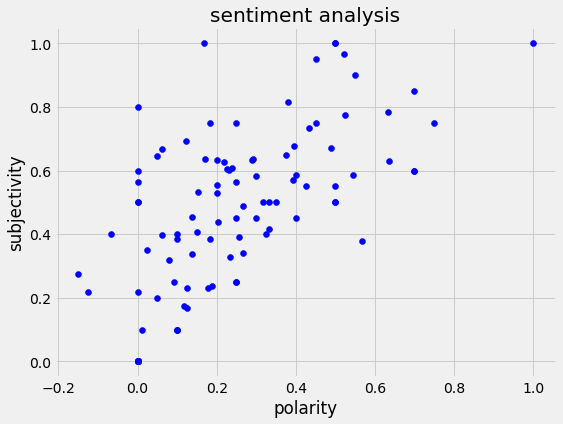

In [ ]:
plt.figure(figsize=(8, 6))
for i in range(0, df.shape[0]):
  plt.scatter(df['polarity'][i], df['subjectivity'][i], color = 'blue')
plt.title('sentiment analysis')
plt.xlabel('polarity')
plt.ylabel('subjectivity')
plt.show()